In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
def plot_roc_curves(fpr_dict, tpr_dict, model_names):

    plt.figure(figsize=(10, 8))

    # Plot ROC curve for each model
    for model_name in model_names:
        fpr = fpr_dict[model_name]
        tpr = tpr_dict[model_name]
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, linestyle='--', label=f'{model_name}: AUC-ROC = {roc_auc:.4f}')

    # Plot the diagonal line for no skill classifier
    plt.plot([0, 1], [0, 1], linestyle=':', lw=2, color='gray')

    # Customize the plot
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.4)

    # Save the plot to a file
    plt.savefig('../res/plot/deepwalk_distance_pca_roc_curves.png')
    plt.show()

In [3]:
def plot_roc_prc_curves(fpr_dict, tpr_dict, prc_dict, rec_dict, model_names):

     # Create subplots
    fig, (ax_roc, ax_prc) = plt.subplots(1, 2, figsize=(12, 6))

    # ROC
    for model_name in model_names:
        fpr = fpr_dict[model_name]
        tpr = tpr_dict[model_name]
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, lw=2, linestyle='--', label=f'{model_name}: AUROC = {roc_auc:.4f}')

    # the diagonal line
    ax_roc.plot([0, 1], [0, 1], linestyle=':', lw=2, color='gray')

    ax_roc.set_xlim([-0.005, 1.005])
    ax_roc.set_ylim([-0.005, 1.005])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('Receiver Operating Characteristic (ROC)')
    ax_roc.legend(loc="lower right")
    ax_roc.grid(alpha=0.4)

    # PRC
    for model_name in model_names:
        prc = prc_dict[model_name]
        rec = rec_dict[model_name]
        prc_auc = auc(rec, prc)
        ax_prc.plot(rec, prc, lw=2, linestyle='--', label=f'{model_name}: AUPRC = {prc_auc:.4f}')


    # Customize the plot
    ax_prc.set_xlim([-0.005, 1.005])
    ax_prc.set_ylim([-0.005, 1.005])
    ax_prc.set_xlabel('Recall')
    ax_prc.set_ylabel('Precision')
    ax_prc.set_title('Precision-Recall Curve (PRC)')
    ax_prc.legend(loc="lower left")
    ax_roc.grid(alpha=0.4)

    # Save the plot to a file
    plt.savefig('../res/plot/deepwalk_distance_pca_roc_prc_curves.png')
    plt.show()

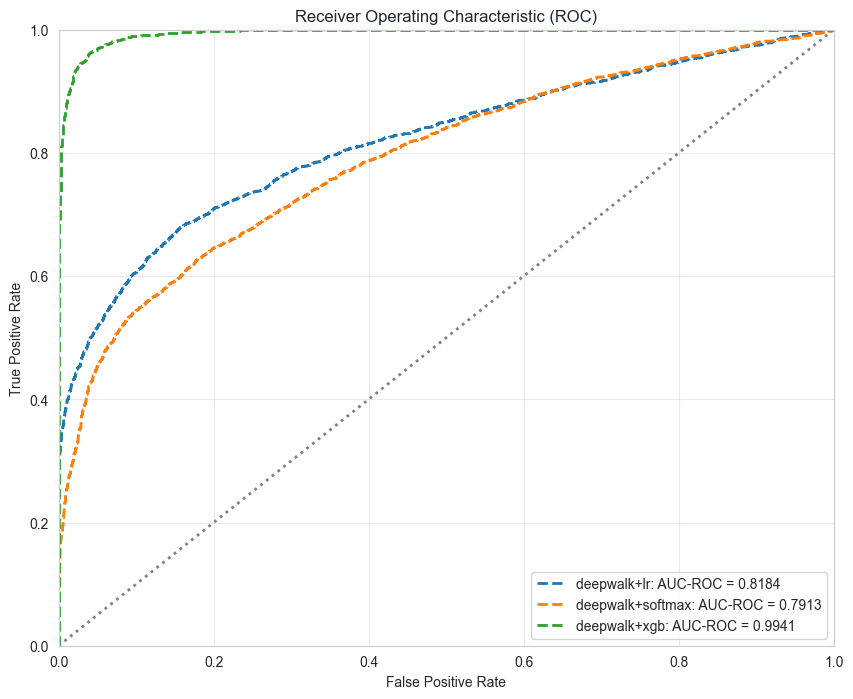

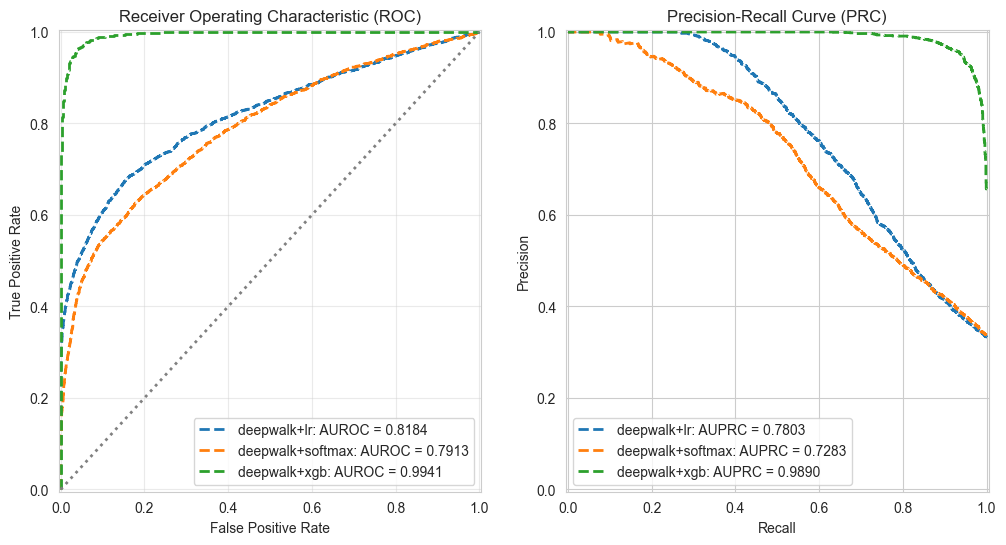

In [4]:
import pandas as pd

file_dir = "../res/plot/"

fpr_dict = {}
tpr_dict = {}
prc_dict = {}
rec_dict = {}
model_list = []

#for encoding in ['node2vec','deepwalk']:
for encoding in ['deepwalk']:
    for model in ['lr','softmax','xgb']:
        file_path = file_dir + model + '/' + encoding + '/'
        curve_name = encoding + '+' + model

        df_roc = pd.read_csv(file_path + 'distance_under_pca_auc_roc.csv')
        df_prc = pd.read_csv(file_path + 'distance_under_pca_auc_prc.csv')

        fpr_dict[curve_name] = list(df_roc['fpr'])
        tpr_dict[curve_name] = list(df_roc['tpr'])
        prc_dict[curve_name] = list(df_prc['precision'])
        rec_dict[curve_name] = list(df_prc['recall'])
        model_list.append(curve_name)

plot_roc_curves(fpr_dict, tpr_dict, model_list)
plot_roc_prc_curves(fpr_dict, tpr_dict, prc_dict, rec_dict, model_list)